In [ ]:
import os
import shutil
import random

# Set up directories
data_dir = "/content/drive/MyDrive/data"  # Change this to your data directory
images_dir = os.path.join(data_dir, "images")
texts_dir = os.path.join(data_dir, "texts")
os.makedirs(images_dir, exist_ok=True)
os.makedirs(texts_dir, exist_ok=True)

# Move image and text files to their respective directories
image_files = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".jpeg") or file.endswith(".png"):
            src_path = os.path.join(root, file)
            dst_path = os.path.join(images_dir, file)
            shutil.move(src_path, dst_path)
            image_files.append(file)
        elif file.endswith(".txt"):
            src_path = os.path.join(root, file)
            dst_path = os.path.join(texts_dir, file)
            shutil.move(src_path, dst_path)

# Split image and text files into train and validation sets
random.shuffle(image_files)
train_size = int(0.8 * len(image_files))
train_files = image_files[:train_size]
val_files = image_files[train_size:]

# Move train files to their respective directories
train_images_dir = os.path.join(data_dir, "train_images")
train_texts_dir = os.path.join(data_dir, "train_texts")
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_texts_dir, exist_ok=True)
for file in train_files:
    src_image_path = os.path.join(images_dir, file)
    src_text_path = os.path.join(texts_dir, os.path.splitext(file)[0] + ".txt")
    dst_image_path = os.path.join(train_images_dir, file)
    dst_text_path = os.path.join(train_texts_dir, os.path.splitext(file)[0] + ".txt")
    shutil.move(src_image_path, dst_image_path)
    shutil.move(src_text_path, dst_text_path)

# Move validation files to their respective directories
val_images_dir = os.path.join(data_dir, "val_images")
val_texts_dir = os.path.join(data_dir, "val_texts")
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_texts_dir, exist_ok=True)
for file in val_files:
    src_image_path = os.path.join(images_dir, file)
    src_text_path = os.path.join(texts_dir, os.path.splitext(file)[0] + ".txt")
    dst_image_path = os.path.join(val_images_dir, file)
    dst_text_path = os.path.join(val_texts_dir, os.path.splitext(file)[0] + ".txt")
    shutil.move(src_image_path, dst_image_path)
    shutil.move(src_text_path, dst_text_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Path to the directory containing text files
text_files_dir = "/content/drive/MyDrive/data/train_texts"

# Output directory to store preprocessed text files
output_dir = "/content/drive/MyDrive/data/Preprocesssed_text_data"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Initialize the stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Process each text file in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_dir, filename)

        with open(file_path, 'r') as file:
            text_data = file.read()

            # Tokenization
            tokenized_data = word_tokenize(text_data)

            # Stopword removal
            filtered_data = [word for word in tokenized_data if word.lower() not in stop_words]

            # Stemming
            stemmed_data = [stemmer.stem(word) for word in filtered_data]

            # Write preprocessed data to output file
            output_file_path = os.path.join(output_dir, filename)
            with open(output_file_path, 'w') as output_file:
                output_file.write(" ".join(stemmed_data))

            print(f"Preprocessed file saved: {output_file_path}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1177.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1146.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1508.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1543.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1612.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1610.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1515.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1729.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_177.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text_data/agri_0_1859.txt
Preprocessed file saved: /content/drive/MyDrive/data/Preprocesssed_text

In [3]:
TRAINING_DIR = "/content/drive/MyDrive/data/train_images"

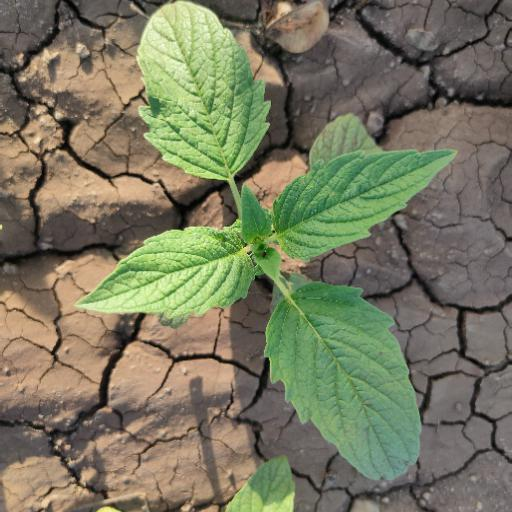

In [4]:
import os
import random
from google.colab.patches import cv2_imshow
import cv2


# Get a list of all JPEG files in the training directory
jpeg_files = [f for f in os.listdir(TRAINING_DIR) if f.endswith('.jpeg')]

# Choose a random JPEG file from the list
random_jpeg_file = random.choice(jpeg_files)

# Load the image using OpenCV
image = cv2.imread(os.path.join(TRAINING_DIR, random_jpeg_file))

# Display the image
cv2_imshow(image)


In [5]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Load the image dataset (assuming it's already preprocessed)
image_data_dir = "/content/drive/MyDrive/data/train_images"
image_filenames = os.listdir(image_data_dir)
image_data = []
for filename in image_filenames:
    image_path = os.path.join(image_data_dir, filename)
    image = cv2.imread(image_path)
    image_data.append(image)
image_data = np.array(image_data)

# Load the labels CSV file
labels_data = pd.read_csv("/content/drive/MyDrive/data/labels.csv")

# Merge the image dataset with the labels based on a common key, such as the image filename
combined_data = pd.merge(labels_data, pd.DataFrame({"image_filename": image_filenames}), on="image_filename")

# Prepare the combined dataset for training
X = image_data
y = to_categorical(combined_data["label"])

# Split the combined dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X_train)

# Design the CNN model
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape=(image_data.shape[1:])))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the augmented training dataset
model.fit(datagen.flow(X_train, y_train, batch_size=16), epochs=100, validation_data=(X_test, y_test))

# Evaluate the model's performance on the testing dataset
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])




Epoch 1/100
46/46 [==============================] - 77s 1s/step - loss: 86.3234 - accuracy: 0.4699 - val_loss: 0.6928 - val_accuracy: 0.5326
Epoch 2/100
46/46 [==============================] - 51s 1s/step - loss: 0.6965 - accuracy: 0.5396 - val_loss: 0.6892 - val_accuracy: 0.5435
Epoch 3/100
46/46 [==============================] - 53s 1s/step - loss: 0.6961 - accuracy: 0.5355 - val_loss: 0.6844 - val_accuracy: 0.5543
Epoch 4/100
46/46 [==============================] - 49s 1s/step - loss: 0.6907 - accuracy: 0.5396 - val_loss: 0.6927 - val_accuracy: 0.5435
Epoch 5/100
46/46 [==============================] - 63s 1s/step - loss: 0.6872 - accuracy: 0.5464 - val_loss: 0.6907 - val_accuracy: 0.5543
Epoch 6/100
46/46 [==============================] - 48s 1s/step - loss: 0.6986 - accuracy: 0.5314 - val_loss: 0.6899 - val_accuracy: 0.5435
Epoch 7/100
46/46 [==============================] - 48s 1s/step - loss: 0.6943 - accuracy: 0.5369 - val_loss: 0.6911 - val_accuracy: 0.5598
Epoch 8/100


In [6]:
model.save("/content/drive/MyDrive/data/Trained-model/trained-model.h5")

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model's performance on the testing dataset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

6/6 [==============================] - 2s 131ms/step
Accuracy: 0.5380434782608695
Precision: 0.5380434782608695
Recall: 1.0
F1 Score: 0.6996466431095405


In [12]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

class_labels = ["weed", "non-weed"]

for fn in uploaded.keys():
  # Predicting images
  path = fn
  img = load_img(path, target_size=(512, 512))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  predicted_class_index = np.argmax(predictions[0])
  predicted_class = class_labels[predicted_class_index]

  print(fn)
  print("Predicted Class:", predicted_class)
  print("Prediction Probabilities:", predictions[0])


Saving download (2).jpeg to download (2).jpeg
1/1 [==============================] - 0s 19ms/step
download (2).jpeg
Predicted Class: non-weed
Prediction Probabilities: [0.45320952 0.5467905 ]
